#Import Libraries and Load Dataset

In [2]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import researchpy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


## Use Raw or Anonymized Dataset

In [6]:
#url = '/content/drive/MyDrive/~Research/COVID-19 News Sentiment/Dataset/rawdataset.csv'
url = '/content/drive/MyDrive/~Research/COVID-19 News Sentiment/Dataset/anondataset.csv'
df = pd.read_csv(url)
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1003332, 18)

In [7]:
df.head()

Post Id   Facebook Id Page Admin Top Country Post Created Date  \
0        1  5.550297e+09                     US          4/4/2020   
1        2  8.304333e+09                     US         6/16/2020   
2        3  8.304333e+09                     US         4/27/2020   
3        4  5.550297e+09                     US         3/31/2020   
4        5  1.170000e+11                     PH         5/25/2020   

   Total Interactions  Likes  Comments  Shares  Love    Wow  Haha     Sad  \
0              307741  57280      8769   51097  5773   3409   246  180683   
1              229507  93112     31566   92459   856   5918  1158    3475   
2              180015  70100     32678   44405  2070  12940   987    1471   
3              167180  16864      6612   34217   759   2438    97  105702   
4              136983   7795     13885  113098  1707     48   208      42   

   Angry  Care                                            Message Image Text  \
0    484     0  "They were as compatible and inseparable as tw...        NaN   
1    467   496  Six months into the coronavirus crisis, there’...        NaN   
2  15138   226  Scientists and billionaires teamed up on a sec...        NaN   
3    491     0  Dr. James T. Goodrich, the neurosurgeon who al...        NaN   
4      6   194  "I will not allow the opening of classes. Baha...        NaN   

                                           Link Text  \
0  Married for 51 years, they died of Covid-19 si...   
1  How Exactly Do You Catch Covid-19? There Is a ...   
2  The Secret Group of Scientists and Billionaire...   
3  Neurosurgeon who separated conjoined twins die...   
4  Duterte: No opening of classes without vaccine...   

                                         Description  
0                                                NaN  
1                                                NaN  
2  They are working around the clock on what they...  
3                                                NaN  
4  In a televised address at past midnight Tuesda...

In [8]:
duplicate = df.duplicated(keep='first')
df[~duplicate]
df.shape

(1003332, 18)

In [9]:
params = {      
  'Post Id': 'count',
  'Facebook Id': 'nunique'
}
df.groupby(['Page Admin Top Country']).agg(params).reset_index()

Page Admin Top Country  Post Id  Facebook Id
0                      AU    56397           42
1                      BD       93            3
2                      BW      106            1
3                      CA   263799           61
4                      CN     2478            2
5                      DE        4            1
6                      GB   179223          241
7                      ID      155            2
8                      IE    11010           10
9                      IL      730            1
10                     IM      748            1
11                     IN   169759           47
12                     KH      368            1
13                     KR        3            2
14                     LK       62            4
15                     MM     3283            3
16                     NP     2446            8
17                     PH   115527           20
18                     PK     1348            7
19                     QA     1526            1
20                     RU     1313            1
21                     SG    54672           15
22                     TH    15274            7
23                     TW        3            3
24                     US   122357           69

###Label Media region, subregion, and country

In [10]:
df['region'] = "Other"
df.loc[df['Page Admin Top Country'] == 'CN', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'ID', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'IN', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'KH', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'LK', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'BD', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'MM', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'NP', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'PH', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'PK', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'SG', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'TH', 'region'] = 'East'
df.loc[df['Page Admin Top Country'] == 'AU', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'CA', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'GB', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'IM', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'IE', 'region'] = 'West'
df.loc[df['Page Admin Top Country'] == 'US', 'region'] = 'West'
df = df.drop(df[(df.region == 'Other')].index)
df['region'].describe()

count     998999
unique         2
top         West
freq      633534
Name: region, dtype: object

In [11]:
df['subregion'] = "Other"
df.loc[df['Page Admin Top Country'] == 'CN', 'subregion'] = 'East Asia'
df.loc[df['Page Admin Top Country'] == 'ID', 'subregion'] = 'SE Asia'
df.loc[df['Page Admin Top Country'] == 'IN', 'subregion'] = 'South Asia'
df.loc[df['Page Admin Top Country'] == 'KH', 'subregion'] = 'SE Asia'
df.loc[df['Page Admin Top Country'] == 'LK', 'subregion'] = 'South Asia'
df.loc[df['Page Admin Top Country'] == 'BD', 'subregion'] = 'South Asia'
df.loc[df['Page Admin Top Country'] == 'MM', 'subregion'] = 'SE Asia'
df.loc[df['Page Admin Top Country'] == 'NP', 'subregion'] = 'South Asia'
df.loc[df['Page Admin Top Country'] == 'PH', 'subregion'] = 'SE Asia'
df.loc[df['Page Admin Top Country'] == 'PK', 'subregion'] = 'South Asia'
df.loc[df['Page Admin Top Country'] == 'SG', 'subregion'] = 'SE Asia'
df.loc[df['Page Admin Top Country'] == 'TH', 'subregion'] = 'SE Asia'
df.loc[df['Page Admin Top Country'] == 'AU', 'subregion'] = 'Oceania'
df.loc[df['Page Admin Top Country'] == 'CA', 'subregion'] = 'North America'
df.loc[df['Page Admin Top Country'] == 'GB', 'subregion'] = 'Europe'
df.loc[df['Page Admin Top Country'] == 'IM', 'subregion'] = 'Europe'
df.loc[df['Page Admin Top Country'] == 'IE', 'subregion'] = 'Europe'
df.loc[df['Page Admin Top Country'] == 'US', 'subregion'] = 'North America'
df = df.drop(df[(df.subregion == 'Other')].index)
df['subregion'].describe()

count            998999
unique                6
top       North America
freq             386156
Name: subregion, dtype: object

In [12]:
df['country'] = "Other"
df.loc[df['Page Admin Top Country'] == 'CN', 'country'] = 'China'
df.loc[df['Page Admin Top Country'] == 'ID', 'country'] = 'Indonesia'
df.loc[df['Page Admin Top Country'] == 'IN', 'country'] = 'India'
df.loc[df['Page Admin Top Country'] == 'KH', 'country'] = 'Cambodia'
df.loc[df['Page Admin Top Country'] == 'LK', 'country'] = 'Sri Lanka'
df.loc[df['Page Admin Top Country'] == 'BD', 'country'] = 'Bangladesh'
df.loc[df['Page Admin Top Country'] == 'MM', 'country'] = 'Myanmar'
df.loc[df['Page Admin Top Country'] == 'NP', 'country'] = 'Nepal'
df.loc[df['Page Admin Top Country'] == 'PH', 'country'] = 'Philippines'
df.loc[df['Page Admin Top Country'] == 'PK', 'country'] = 'Pakistan'
df.loc[df['Page Admin Top Country'] == 'SG', 'country'] = 'Singapore'
df.loc[df['Page Admin Top Country'] == 'TH', 'country'] = 'Thailand'
df.loc[df['Page Admin Top Country'] == 'AU', 'country'] = 'Australia'
df.loc[df['Page Admin Top Country'] == 'CA', 'country'] = 'Canada'
df.loc[df['Page Admin Top Country'] == 'GB', 'country'] = 'United Kingdom'
df.loc[df['Page Admin Top Country'] == 'IM', 'country'] = 'Isle of Man'
df.loc[df['Page Admin Top Country'] == 'IE', 'country'] = 'Ireland'
df.loc[df['Page Admin Top Country'] == 'US', 'country'] = 'United States'
df = df.drop(df[(df.country == 'Other')].index)
df['country'].describe()

count     998999
unique        18
top       Canada
freq      263799
Name: country, dtype: object

In [14]:
params = {      
  'Post Id': 'count',
  'Facebook Id': 'nunique'
}
dy = df.groupby(['region','subregion','country']).agg(params).reset_index()
dy

region      subregion         country  Post Id  Facebook Id
0    East      East Asia           China     2478            2
1    East        SE Asia        Cambodia      368            1
2    East        SE Asia       Indonesia      155            2
3    East        SE Asia         Myanmar     3283            3
4    East        SE Asia     Philippines   115527           20
5    East        SE Asia       Singapore    54672           15
6    East        SE Asia        Thailand    15274            7
7    East     South Asia      Bangladesh       93            3
8    East     South Asia           India   169759           47
9    East     South Asia           Nepal     2446            8
10   East     South Asia        Pakistan     1348            7
11   East     South Asia       Sri Lanka       62            4
12   West         Europe         Ireland    11010           10
13   West         Europe     Isle of Man      748            1
14   West         Europe  United Kingdom   179223          241
15   West  North America          Canada   263799           61
16   West  North America   United States   122357           69
17   West        Oceania       Australia    56397           42

In [16]:
params = {      
  'Facebook Id': 'nunique'  
}
dy = df.groupby(['region','subregion']).agg(params).reset_index()
dy

region      subregion  Facebook Id
0   East      East Asia            2
1   East        SE Asia           46
2   East     South Asia           62
3   West         Europe          247
4   West  North America          124
5   West        Oceania           42

In [17]:
params = {      
  'Facebook Id': 'count'  
}
dy = df.groupby(['region','subregion']).agg(params).reset_index()
dy

region      subregion  Facebook Id
0   East      East Asia         2478
1   East        SE Asia       189279
2   East     South Asia       173708
3   West         Europe       190981
4   West  North America       386156
5   West        Oceania        56397

###Cleanup Dataset

In [18]:
#Count special reactions and remove posts receiving only 1 count of special reaction
df['specialreactions'] = df['Love'] + df['Wow'] + df['Haha'] + df['Sad'] + df['Angry'] + df['Care']
df['allreactions'] = df['specialreactions'] + df['Likes']
df = df.drop(df[(df.specialreactions < 2)].index)
df.shape

(711646, 23)

In [19]:
df[['Likes','Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].describe().round(2)

Likes       Love        Wow       Haha        Sad      Angry  \
count  711646.00  711646.00  711646.00  711646.00  711646.00  711646.00   
mean      272.26      28.05      21.10      43.28      70.18      39.32   
std      1359.25     285.03     157.41     330.62     738.27     367.43   
min         0.00       0.00       0.00       0.00       0.00       0.00   
25%        15.00       0.00       0.00       1.00       0.00       0.00   
50%        46.00       1.00       2.00       3.00       2.00       1.00   
75%       152.00       5.00       8.00      16.00      16.00       6.00   
max    149827.00   43629.00   29331.00   71273.00  180683.00   51491.00   

            Care  
count  711646.00  
mean        6.99  
std       116.74  
min         0.00  
25%         0.00  
50%         0.00  
75%         1.00  
max     28045.00

## Table 1

In [20]:
params = {      
  'Facebook Id': 'nunique',  
  'Post Id': 'count',
  'Total Interactions': 'sum',
  'specialreactions': 'sum'  
}
dy = df.groupby(['region','subregion','country']).agg(params).reset_index()
dy

region      subregion         country  Facebook Id  Post Id  \
0    East      East Asia           China            2     1201   
1    East        SE Asia        Cambodia            1       91   
2    East        SE Asia       Indonesia            2       76   
3    East        SE Asia         Myanmar            3     1345   
4    East        SE Asia     Philippines           20    95559   
5    East        SE Asia       Singapore           14    46674   
6    East        SE Asia        Thailand            6    10221   
7    East     South Asia      Bangladesh            3       69   
8    East     South Asia           India           38    67709   
9    East     South Asia           Nepal            5     1526   
10   East     South Asia        Pakistan            5      304   
11   East     South Asia       Sri Lanka            3       43   
12   West         Europe         Ireland           10     2951   
13   West         Europe     Isle of Man            1      543   
14   West         Europe  United Kingdom          236   109773   
15   West  North America          Canada           60   208458   
16   West  North America   United States           66   114417   
17   West        Oceania       Australia           41    50686   

    Total Interactions  specialreactions  
0              1446111             38548  
1                10666               593  
2                 5480              1168  
3               260852              7350  
4             71455137          22068064  
5             29045912           6099392  
6              1189140            241527  
7                62305              4441  
8             22091258           3721538  
9               140720             20402  
10              108077              8583  
11               27842              3175  
12              234932             35678  
13               39862             10548  
14            47447149          12032252  
15            62402186          16461408  
16           239334047          81016163  
17            23995733           6911059

In [21]:
params = {      
  'Facebook Id': 'nunique',  
  'Post Id': 'count',
  'Total Interactions': 'sum',
  'specialreactions': 'sum'  
}
dy = df.groupby(['region','subregion']).agg(params).reset_index()
dy

region      subregion  Facebook Id  Post Id  Total Interactions  \
0   East      East Asia            2     1201             1446111   
1   East        SE Asia           44   153966           101967187   
2   East     South Asia           48    69651            22430202   
3   West         Europe          242   113267            47721943   
4   West  North America          120   322875           301736233   
5   West        Oceania           41    50686            23995733   

   specialreactions  
0             38548  
1          28418094  
2           3758139  
3          12078478  
4          97477571  
5           6911059

In [22]:
params = {      
  'Facebook Id': 'nunique',  
  'Post Id': 'count',
  'Total Interactions': 'sum',
  'specialreactions': 'sum'  
}
dy = df.groupby(['region']).agg(params).reset_index()
dy

region  Facebook Id  Post Id  Total Interactions  specialreactions
0   East           89   224818           125843500          32214781
1   West          360   486828           373453909         116467108

###Correlation Between Special Reactions

In [23]:
# Number of post having each reaction
df['hasLikes'] = 1
df.loc[df['Likes'] == 0, 'hasLikes'] = 0
df['hasLove'] = 1
df.loc[df['Love'] == 0, 'hasLove'] = 0
df['hasWow'] = 1
df.loc[df['Wow'] == 0, 'hasWow'] = 0
df['hasHaha'] = 1
df.loc[df['Haha'] == 0, 'hasHaha'] = 0
df['hasSad'] = 1
df.loc[df['Sad'] == 0, 'hasSad'] = 0
df['hasAngry'] = 1
df.loc[df['Angry'] == 0, 'hasAngry'] = 0
df['hasCare'] = 1
df.loc[df['Care'] == 0, 'hasCare'] = 0

# % of Special Reactions
df['pLove'] = df['Love']/df['specialreactions']
df['pWow'] = df['Wow']/df['specialreactions']
df['pHaha'] = df['Haha']/df['specialreactions']
df['pSad'] = df['Sad']/df['specialreactions']
df['pAngry'] = df['Angry']/df['specialreactions']
df['pCare'] = df['Care']/df['specialreactions']

In [24]:
dfhr = df[['hasLove', 'hasWow', 'hasHaha', 'hasSad', 'hasAngry', 'hasCare']]
dfhr.describe().round(2)

hasLove     hasWow    hasHaha     hasSad   hasAngry    hasCare
count  711646.00  711646.00  711646.00  711646.00  711646.00  711646.00
mean        0.58       0.69       0.76       0.69       0.58       0.39
std         0.49       0.46       0.43       0.46       0.49       0.49
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       1.00       0.00       0.00       0.00
50%         1.00       1.00       1.00       1.00       1.00       0.00
75%         1.00       1.00       1.00       1.00       1.00       1.00
max         1.00       1.00       1.00       1.00       1.00       1.00

In [25]:
dfpr = df[['pLove', 'pWow', 'pHaha', 'pSad', 'pAngry', 'pCare']]
dfpr.describe().round(2)

pLove       pWow      pHaha       pSad     pAngry      pCare
count  711646.00  711646.00  711646.00  711646.00  711646.00  711646.00
mean        0.15       0.12       0.29       0.27       0.13       0.04
std         0.27       0.18       0.32       0.33       0.21       0.10
min         0.00       0.00       0.00       0.00       0.00       0.00
25%         0.00       0.00       0.00       0.00       0.00       0.00
50%         0.01       0.05       0.16       0.08       0.02       0.00
75%         0.17       0.17       0.53       0.50       0.15       0.02
max         1.00       1.00       1.00       1.00       1.00       1.00

hasLove  hasWow  hasHaha  hasSad  hasAngry  hasCare
hasLove     1.000   0.172    0.140  -0.023     0.139    0.282
hasWow      0.172   1.000    0.214   0.296     0.306    0.234
hasHaha     0.140   0.214    1.000   0.036     0.302    0.166
hasSad     -0.023   0.296    0.036   1.000     0.274    0.198
hasAngry    0.139   0.306    0.302   0.274     1.000    0.197
hasCare     0.282   0.234    0.166   0.198     0.197    1.000

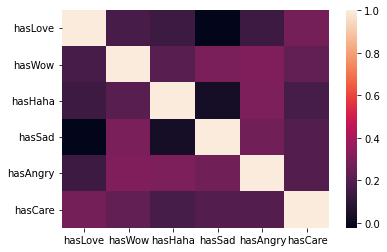

In [26]:
sns.heatmap(dfhr.corr())
dfhr.corr().round(3)

pLove   pWow  pHaha   pSad  pAngry  pCare
pLove   1.000 -0.151 -0.255 -0.371  -0.207  0.069
pWow   -0.151  1.000 -0.227 -0.087  -0.126 -0.086
pHaha  -0.255 -0.227  1.000 -0.491  -0.151 -0.158
pSad   -0.371 -0.087 -0.491  1.000  -0.233 -0.070
pAngry -0.207 -0.126 -0.151 -0.233   1.000 -0.139
pCare   0.069 -0.086 -0.158 -0.070  -0.139  1.000

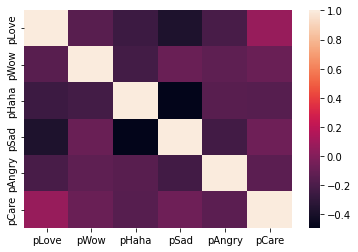

In [27]:
sns.heatmap(dfpr.corr())
dfpr.corr().round(3)

###Calculate Score

In [28]:
# Vader Sentiment Score Based on Text
df['txt'] = df[['Image Text', 'Link Text', 'Description', 'Message']].fillna('').agg(' '.join, axis=1)

analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['txt']]
#df['vspos'] = [analyzer.polarity_scores(x)['pos'] for x in df['txt']]
#df['vsneg'] = [analyzer.polarity_scores(x)['neg'] for x in df['txt']]
#df['vsneu'] = [analyzer.polarity_scores(x)['neu'] for x in df['txt']]

In [29]:
# Intensity = proportion of special reactions over all reactions
df['intensity'] = df['specialreactions']/df['allreactions']
df['intensity'].describe().round(3)

count    711646.000
mean          0.415
std           0.256
min           0.003
25%           0.196
50%           0.377
75%           0.619
max           1.000
Name: intensity, dtype: float64

In [30]:
# Valence = -1 if love < sad + angry, and 1 if otherwise
df['valence'] = 1
df.loc[df['Love'] < (df['Sad']+df['Angry']), 'valence'] = -1
df['valence'].describe().round(3)

count    711646.000
mean         -0.313
std           0.950
min          -1.000
25%          -1.000
50%          -1.000
75%           1.000
max           1.000
Name: valence, dtype: float64

In [31]:
# Polarity = Intensity * Valence
df['polarity'] = df['intensity']*df['valence']
df['polarity'].describe().round(3)

count    711646.000
mean         -0.250
std           0.418
min          -1.000
25%          -0.596
50%          -0.308
75%           0.114
max           1.000
Name: polarity, dtype: float64

###Categorize Data

In [32]:
df['month'] = pd.DatetimeIndex(df['Post Created Date']).month
df["month"] = df.month.map("{:02}".format)
df['year'] = pd.DatetimeIndex(df['Post Created Date']).year.astype(str) + "-" + df['month']
df['year'].describe()

count      711646
unique         27
top       2020-04
freq        60041
Name: year, dtype: object

In [33]:
df[['year','region']]

year region
0       2020-04   West
1       2020-06   West
2       2020-04   West
3       2020-03   West
4       2020-05   East
...         ...    ...
987965  2020-12   West
987983  2020-11   West
988005  2020-07   West
988006  2020-07   West
988016  2020-08   West

[711646 rows x 2 columns]

### Tone & Reactions Labels

In [34]:
# Tone Label
df['tone'] = "neutral"
df.loc[df['compound'] > 0, 'tone'] = "positive"
df.loc[df['compound'] < 0, 'tone'] = "negative"

In [35]:
ds = df.groupby(['region','tone'])['tone'].count()
dst = df.groupby(['region'])['tone'].count()
100*ds/dst

region  tone    
East    negative    40.365985
        neutral     12.478093
        positive    47.155922
West    negative    43.037171
        neutral     12.209446
        positive    44.753383
Name: tone, dtype: float64

In [36]:
# Reaction Label
df['reaction'] = "neutral"
df.loc[df['valence'] > 0, 'reaction'] = "positive"
df.loc[df['valence'] < 0, 'reaction'] = "negative"

##Table 2

In [37]:
dr = df.groupby(['region','subregion','reaction'])['reaction'].count()
drt = df.groupby(['region','subregion'])['reaction'].count()
100*dr/drt

region  subregion      reaction
East    East Asia      negative    20.732723
                       positive    79.267277
        SE Asia        negative    57.345128
                       positive    42.654872
        South Asia     negative    48.114169
                       positive    51.885831
West    Europe         negative    70.065421
                       positive    29.934579
        North America  negative    70.727062
                       positive    29.272938
        Oceania        negative    73.969143
                       positive    26.030857
Name: reaction, dtype: float64

In [38]:
drt = df.groupby(['region','subregion','tone','reaction'])['reaction'].count()
drtt = df.groupby(['region','subregion','tone'])['reaction'].count()
100*drt/drtt

region  subregion      tone      reaction
East    East Asia      negative  negative    26.923077
                                 positive    73.076923
                       neutral   negative    20.270270
                                 positive    79.729730
                       positive  negative    17.194570
                                 positive    82.805430
        SE Asia        negative  negative    66.891020
                                 positive    33.108980
                       neutral   negative    56.869646
                                 positive    43.130354
                       positive  negative    49.277664
                                 positive    50.722336
        South Asia     negative  negative    57.275191
                                 positive    42.724809
                       neutral   negative    42.123613
                                 positive    57.876387
                       positive  negative    41.410774
                       

In [39]:
drt = df.groupby(['region','tone','reaction'])['reaction'].count()
drtt = df.groupby(['region','tone'])['reaction'].count()
100*drt/drtt

region  tone      reaction
East    negative  negative    63.630854
                  positive    36.369146
        neutral   negative    53.359712
                  positive    46.640288
        positive  negative    46.539641
                  positive    53.460359
West    negative  negative    77.737845
                  positive    22.262155
        neutral   negative    71.158667
                  positive    28.841333
        positive  negative    64.277649
                  positive    35.722351
Name: reaction, dtype: float64

###Save as Processed Dataset

In [40]:
df.to_csv('processed.csv', chunksize=1000)

In [41]:
from google.colab import files
files.download("processed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Use Processed Dataset

In [ ]:
#Processed Dataset
url1 = '/content/drive/MyDrive/~Research/COVID-19 News Sentiment/Dataset/processed.csv'
df = pd.read_csv(url1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,4,5,10,11,12,13,14,23,25,30,31,32,33,34,35,36,38,39,40,41,42,43,59,69,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(538722, 72)

In [42]:
df.shape

(711646, 45)

In [43]:
dfEast = df.drop(df[(df.region == 'West')].index)
dfWest = df.drop(df[(df.region == 'East')].index)

In [44]:
dfppEast = df.loc[(df['tone'] == "positive") & (df['reaction'] == "positive") & (df['region'] == "East")]
dfpnEast = df.loc[(df['tone'] == "positive") & (df['reaction'] == "negative") & (df['region'] == "East")]
dfnpEast = df.loc[(df['tone'] == "negative") & (df['reaction'] == "positive") & (df['region'] == "East")]
dfnnEast = df.loc[(df['tone'] == "negative") & (df['reaction'] == "negative") & (df['region'] == "East")]

In [45]:
dfppWest = df.loc[(df['tone'] == "positive") & (df['reaction'] == "positive") & (df['region'] == "West")]
dfpnWest = df.loc[(df['tone'] == "positive") & (df['reaction'] == "negative") & (df['region'] == "West")]
dfnpWest = df.loc[(df['tone'] == "negative") & (df['reaction'] == "positive") & (df['region'] == "West")]
dfnnWest = df.loc[(df['tone'] == "negative") & (df['reaction'] == "negative") & (df['region'] == "West")]

In [46]:
dfc = df[df['txt'].str.contains('case|Case', na=False)]
dfc.shape

(168487, 45)

In [47]:
dfv = df[df['txt'].str.contains('vaccine|Vaccine', na=False)]
dfv.shape

(108902, 45)

In [48]:
dfh = df[df['txt'].str.contains('health|Health', na=False)]
dfh.shape

(143474, 45)

In [49]:
dfd = df[df['txt'].str.contains('death|Death', na=False)]
dfd.shape

(70488, 45)

### Monthly Aggregate

In [50]:
dfcEast = dfEast[dfEast['txt'].str.contains('case|Case', na=False)]
dfcWest = dfWest[dfWest['txt'].str.contains('case|Case', na=False)]

In [51]:
dfvEast = dfEast[dfEast['txt'].str.contains('vaccine|Vaccine', na=False)]
dfvWest = dfWest[dfWest['txt'].str.contains('vaccine|Vaccine', na=False)]

In [52]:
dfhEast = dfEast[dfEast['txt'].str.contains('health|Health', na=False)]
dfhWest = dfWest[dfWest['txt'].str.contains('health|Health', na=False)]

In [53]:
dfdEast = dfEast[dfEast['txt'].str.contains('death|Death', na=False)]
dfdWest = dfWest[dfWest['txt'].str.contains('death|Death', na=False)]

In [54]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dt = df.groupby(['year','region']).agg(params).reset_index()

In [55]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtc = dfc.groupby(['year','region']).agg(params).reset_index()

In [56]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtv = dfv.groupby(['year','region']).agg(params).reset_index()

In [57]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dth = dfh.groupby(['year','region']).agg(params).reset_index()

In [58]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dtd = dfd.groupby(['year','region']).agg(params).reset_index()

In [59]:
dtEast = dt.drop(dt[(dt.region == 'West')].index)
dtWest = dt.drop(dt[(dt.region == 'East')].index)

In [60]:
dtcEast = dtc.drop(dtc[(dtc.region == 'West')].index)
dtcWest = dtc.drop(dtc[(dtc.region == 'East')].index)

In [61]:
dtvEast = dtv.drop(dtv[(dtv.region == 'West')].index)
dtvWest = dtv.drop(dtv[(dtv.region == 'East')].index)

In [62]:
dthEast = dth.drop(dth[(dth.region == 'West')].index)
dthWest = dth.drop(dth[(dth.region == 'East')].index)

In [63]:
dtdEast = dtd.drop(dtd[(dtd.region == 'West')].index)
dtdWest = dtd.drop(dtd[(dtd.region == 'East')].index)

In [64]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
ds = df.groupby(['year','subregion']).agg(params).reset_index()

##WordCloud - Figure 5

In [65]:
wcstopwords = set(STOPWORDS)
more_stopwords = {'covid','covid-19','coronavirus', 'https', 'india','philippine','philippines','singapore','china','canada','america','canadian','american','manila','ontario','ottawa','said','will'}
wcstopwords = wcstopwords.union(more_stopwords)

####All

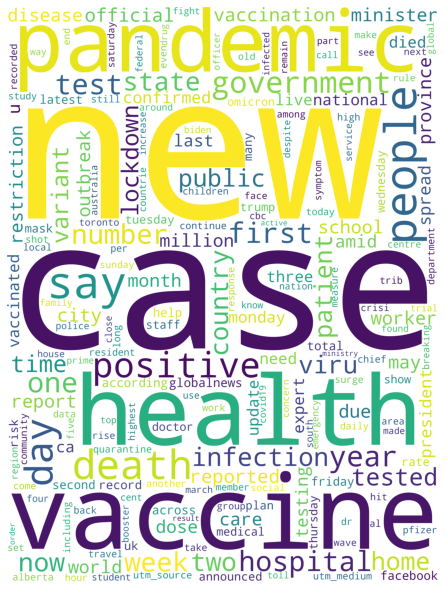

In [66]:
#Wordcloud for all data
words = ''

for val in df.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=3000, height=4000, 
               stopwords=wcstopwords).generate(words)



plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

####East

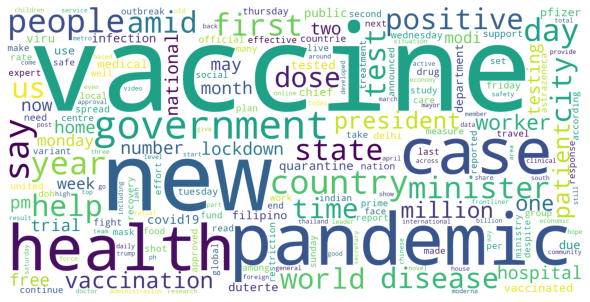

In [ ]:
#Wordcloud for positive tone - positive reactions
words = ''

for val in dfppEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)



plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

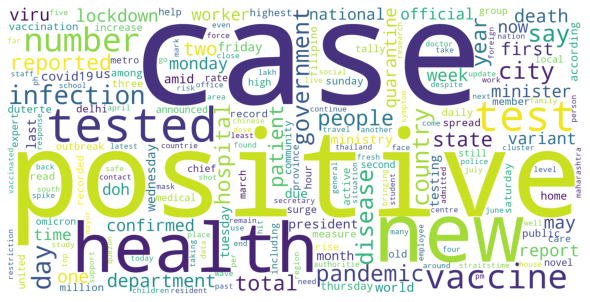

In [ ]:
#Wordcloud for the positive tone - negative reaction
words = ''

for val in dfpnEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

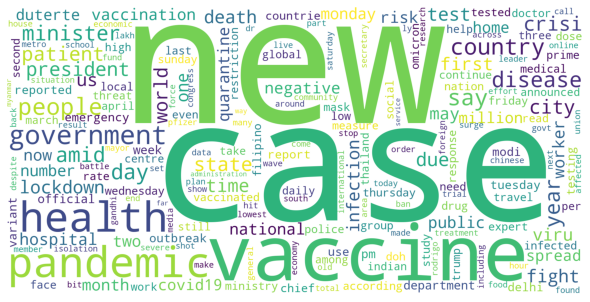

In [ ]:
#Wordcloud for the negative tone - positive reaction
words = ''

for val in dfnpEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

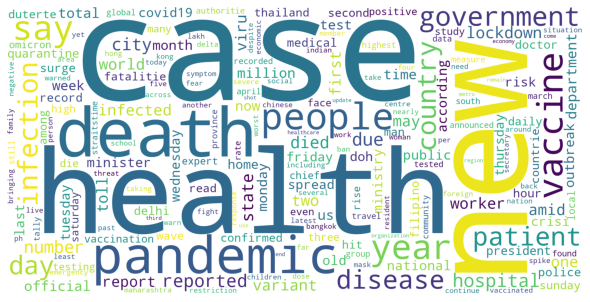

In [ ]:
#Wordcloud for the negative tone and negative reaction
words = ''

for val in dfnnEast.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

####West

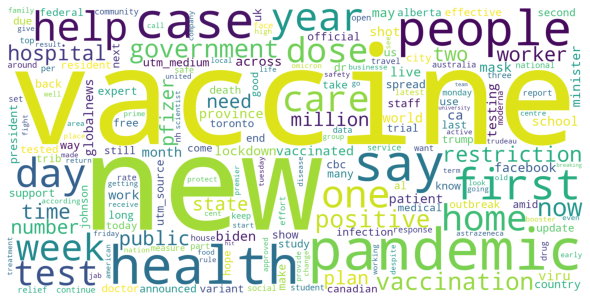

In [ ]:
#Wordcloud for the positive tone - positive reaction
words = ''

for val in dfppWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)



plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

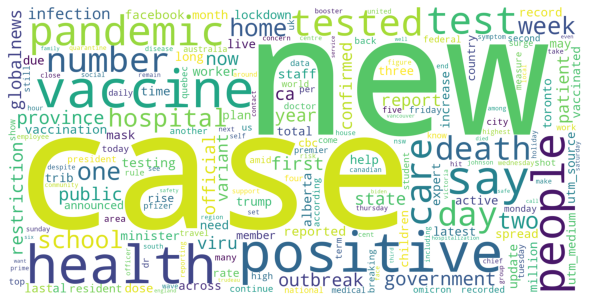

In [ ]:
#Wordcloud for the positive tone - negative reaction
words = ''

for val in dfpnWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

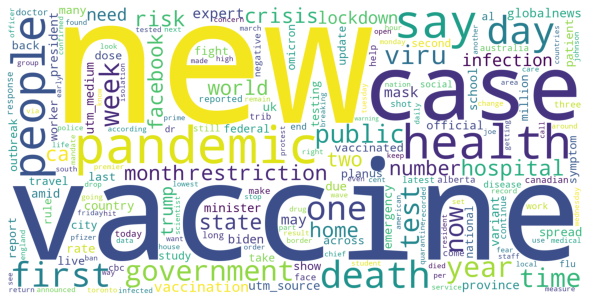

In [ ]:
#Wordcloud for the negative tone - positive reaction
words = ''

for val in dfnpWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

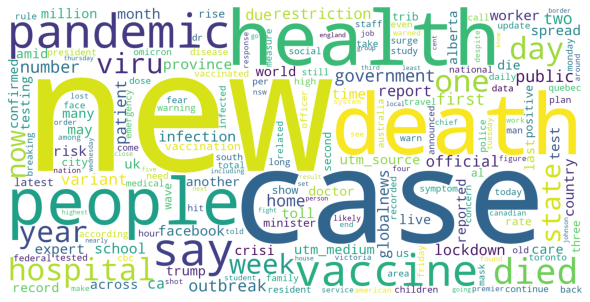

In [ ]:
#Wordcloud for the negative tone and negative reaction
words = ''

for val in dfnnWest.txt:
  val = str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  words += " ".join(tokens)+" "

wc = WordCloud(background_color='white', 
               collocations=False, width=2000, height=1000, 
               stopwords=wcstopwords).generate(words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##Welch's T-Tests - Table 3

####News Tone

In [68]:
# All Dataset
researchpy.ttest(dfEast['compound'], dfWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound  224818.0  0.033503  0.604789  0.001276   0.031003  0.036003
 1  compound  486828.0 -0.003234  0.578821  0.000830  -0.004859 -0.001608
 2  combined  711646.0  0.008372  0.587397  0.000696   0.007007  0.009737,
                         Welch's t-test      results
 0  Difference (compound - compound) =        0.0367
 1                Degrees of freedom =   420493.5583
 2                                 t =       24.1441
 3             Two side test p value =        0.0000
 4            Difference < 0 p value =        1.0000
 5            Difference > 0 p value =        0.0000
 6                         Cohen's d =        0.0626
 7                         Hedge's g =        0.0626
 8                     Glass's delta =        0.0607
 9                       Pearson's r =        0.0372)

In [70]:
# 'Case' subset
researchpy.ttest(dfcEast['compound'], dfcWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound   55581.0 -0.010791  0.546000  0.002316  -0.015330 -0.006252
 1  compound  112906.0  0.021735  0.511220  0.001521   0.018753  0.024717
 2  combined  168487.0  0.011005  0.523171  0.001275   0.008507  0.013504,
                         Welch's t-test      results
 0  Difference (compound - compound) =       -0.0325
 1                Degrees of freedom =   104339.1973
 2                                 t =      -11.7382
 3             Two side test p value =        0.0000
 4            Difference < 0 p value =        0.0000
 5            Difference > 0 p value =        1.0000
 6                         Cohen's d =       -0.0622
 7                         Hedge's g =       -0.0622
 8                     Glass's delta =       -0.0596
 9                       Pearson's r =        0.0363)

In [71]:
# 'Vaccine' subset
researchpy.ttest(dfvEast['compound'], dfvWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound   32356.0  0.147558  0.552794  0.003073   0.141534  0.153581
 1  compound   76546.0  0.096134  0.545822  0.001973   0.092267  0.100001
 2  combined  108902.0  0.111413  0.548404  0.001662   0.108155  0.114670,
                         Welch's t-test     results
 0  Difference (compound - compound) =       0.0514
 1                Degrees of freedom =   60197.5286
 2                                 t =      14.0813
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.0939
 7                         Hedge's g =       0.0939
 8                     Glass's delta =       0.0930
 9                       Pearson's r =       0.0573)

In [72]:
# 'Health' subset
researchpy.ttest(dfhEast['compound'], dfhWest['compound'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  compound   46174.0 -0.014232  0.588336  0.002738  -0.019598 -0.008865
 1  compound   97300.0  0.005060  0.569405  0.001825   0.001482  0.008638
 2  combined  143474.0 -0.001149  0.575634  0.001520  -0.004127  0.001830,
                         Welch's t-test     results
 0  Difference (compound - compound) =      -0.0193
 1                Degrees of freedom =   88086.7595
 2                                 t =      -5.8624
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       0.0000
 5            Difference > 0 p value =       1.0000
 6                         Cohen's d =      -0.0335
 7                         Hedge's g =      -0.0335
 8                     Glass's delta =      -0.0328
 9                       Pearson's r =       0.0197)

In [73]:
# 'Death' subset
researchpy.ttest(dfdEast['compound'], dfdWest['compound'],equal_variances= False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  compound  17290.0 -0.374222  0.556327  0.004231  -0.382515 -0.365929
 1  compound  53198.0 -0.263390  0.554960  0.002406  -0.268106 -0.258674
 2  combined  70488.0 -0.290576  0.557336  0.002099  -0.294691 -0.286462,
                         Welch's t-test     results
 0  Difference (compound - compound) =      -0.1108
 1                Degrees of freedom =   29286.2797
 2                                 t =     -22.7711
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       0.0000
 5            Difference > 0 p value =       1.0000
 6                         Cohen's d =      -0.1996
 7                         Hedge's g =      -0.1996
 8                     Glass's delta =      -0.1992
 9                       Pearson's r =       0.1319)

####Public Reactions

In [74]:
researchpy.ttest(dfEast['polarity'], dfWest['polarity'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity  224818.0 -0.105635  0.333283  0.000703  -0.107013 -0.104257
 1  polarity  486828.0 -0.317307  0.435868  0.000625  -0.318532 -0.316083
 2  combined  711646.0 -0.250437  0.418016  0.000496  -0.251409 -0.249466,
                         Welch's t-test      results
 0  Difference (polarity - polarity) =        0.2117
 1                Degrees of freedom =   559128.8097
 2                                 t =      225.0916
 3             Two side test p value =        0.0000
 4            Difference < 0 p value =        1.0000
 5            Difference > 0 p value =        0.0000
 6                         Cohen's d =        0.5210
 7                         Hedge's g =        0.5210
 8                     Glass's delta =        0.6351
 9                       Pearson's r =        0.2882)

In [76]:
# 'Case' subset
researchpy.ttest(dfcEast['polarity'], dfcWest['polarity'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity   55581.0 -0.203096  0.289086  0.001226  -0.205500 -0.200693
 1  polarity  112906.0 -0.444578  0.392176  0.001167  -0.446866 -0.442290
 2  combined  168487.0 -0.364917  0.378846  0.000923  -0.366726 -0.363108,
                         Welch's t-test      results
 0  Difference (polarity - polarity) =        0.2415
 1                Degrees of freedom =   143806.1682
 2                                 t =      142.6469
 3             Two side test p value =        0.0000
 4            Difference < 0 p value =        1.0000
 5            Difference > 0 p value =        0.0000
 6                         Cohen's d =        0.6681
 7                         Hedge's g =        0.6681
 8                     Glass's delta =        0.8353
 9                       Pearson's r =        0.3521)

In [77]:
# 'Vaccine' subset
researchpy.ttest(dfvEast['polarity'], dfvWest['polarity'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity   32356.0 -0.009537  0.346001  0.001924  -0.013308 -0.005767
 1  polarity   76546.0 -0.201906  0.431899  0.001561  -0.204965 -0.198846
 2  combined  108902.0 -0.144751  0.417625  0.001266  -0.147231 -0.142270,
                         Welch's t-test     results
 0  Difference (polarity - polarity) =       0.1924
 1                Degrees of freedom =   75220.5351
 2                                 t =      77.6531
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.4712
 7                         Hedge's g =       0.4712
 8                     Glass's delta =       0.5560
 9                       Pearson's r =       0.2724)

In [78]:
# 'Health' subset
researchpy.ttest(dfhEast['polarity'], dfhWest['polarity'],equal_variances= False)

(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  polarity   46174.0 -0.153667  0.331389  0.001542  -0.156690 -0.150645
 1  polarity   97300.0 -0.353873  0.431326  0.001383  -0.356583 -0.351163
 2  combined  143474.0 -0.289441  0.412624  0.001089  -0.291576 -0.287306,
                         Welch's t-test      results
 0  Difference (polarity - polarity) =        0.2002
 1                Degrees of freedom =   114990.2217
 2                                 t =       96.6555
 3             Two side test p value =        0.0000
 4            Difference < 0 p value =        1.0000
 5            Difference > 0 p value =        0.0000
 6                         Cohen's d =        0.4982
 7                         Hedge's g =        0.4982
 8                     Glass's delta =        0.6041
 9                       Pearson's r =        0.2741)

In [79]:
# 'Death' subset
researchpy.ttest(dfdEast['polarity'], dfdWest['polarity'],equal_variances= False)

(   Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  polarity  17290.0 -0.244031  0.270542  0.002057  -0.248064 -0.239999
 1  polarity  53198.0 -0.530943  0.368477  0.001598  -0.534074 -0.527811
 2  combined  70488.0 -0.460566  0.368324  0.001387  -0.463285 -0.457847,
                         Welch's t-test     results
 0  Difference (polarity - polarity) =       0.2869
 1                Degrees of freedom =   39729.8190
 2                                 t =     110.1426
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.8268
 7                         Hedge's g =       0.8268
 8                     Glass's delta =       1.0605
 9                       Pearson's r =       0.4837)

## Correlation Tests - Table 4

In [80]:
researchpy.corr_pair(dfWest[['compound','polarity']])

r value p-value       N
compound & polarity  0.1559  0.0000  486828

In [81]:
researchpy.corr_pair(dfEast[['compound','polarity']])

r value p-value       N
compound & polarity  0.1533  0.0000  224818

In [82]:
researchpy.corr_pair(dtWest[['compound','polarity']])

r value p-value   N
compound & polarity  0.2271  0.2545  27

In [83]:
researchpy.corr_pair(dtEast[['compound','polarity']])

r value p-value   N
compound & polarity  0.6258  0.0005  27

In [84]:
researchpy.corr_pair(dtcWest[['compound','polarity']])

r value p-value   N
compound & polarity  -0.2904  0.1417  27

In [85]:
researchpy.corr_pair(dtcEast[['compound','polarity']])

r value p-value   N
compound & polarity  0.3042  0.1230  27

In [86]:
researchpy.corr_pair(dtvWest[['compound','polarity']])

r value p-value   N
compound & polarity  0.3128  0.1121  27

In [87]:
researchpy.corr_pair(dtvEast[['compound','polarity']])

r value p-value   N
compound & polarity  0.4308  0.0249  27

In [88]:
researchpy.corr_pair(dthWest[['compound','polarity']])

r value p-value   N
compound & polarity  -0.0044  0.9825  27

In [89]:
researchpy.corr_pair(dthEast[['compound','polarity']])

r value p-value   N
compound & polarity  0.3760  0.0533  27

In [90]:
researchpy.corr_pair(dtdWest[['compound','polarity']])

r value p-value   N
compound & polarity  -0.0144  0.9433  27

In [91]:
researchpy.corr_pair(dtdEast[['compound','polarity']])

r value p-value   N
compound & polarity  0.5955  0.0010  27

In [92]:
params = {    
  'compound': 'mean',
  'polarity': 'mean'
}
dd = df.groupby(['Post Created Date','year','region']).agg(params).reset_index()
dd

Post Created Date     year region  compound  polarity
0             1/1/2022  2022-01   East  0.149548 -0.162437
1             1/1/2022  2022-01   West  0.066898 -0.303735
2            1/10/2021  2021-01   East  0.123744 -0.054030
3            1/10/2021  2021-01   West  0.002415 -0.362170
4            1/10/2022  2022-01   East  0.105177 -0.149369
...                ...      ...    ...       ...       ...
1577          9/8/2021  2021-09   West -0.010908 -0.386049
1578          9/9/2020  2020-09   East  0.046954 -0.124901
1579          9/9/2020  2020-09   West -0.028468 -0.379900
1580          9/9/2021  2021-09   East  0.043332 -0.203503
1581          9/9/2021  2021-09   West  0.002957 -0.409413

[1582 rows x 5 columns]

In [ ]:
ddEast = dd.drop(dd[(dd.region == 'West')].index)
ddWest = dd.drop(dd[(dd.region == 'East')].index)

##Line Charts - Figure 6

####All Dataset

In [ ]:
fig = px.line(dt, 
              x='year', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 2000,
              height = 2000,             
              labels={"year": ""})

fig.update_traces(line=dict(width=10))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
newlegends = {"compound": "News Tone", "polarity": "Public Reaction"}
fig.for_each_trace(lambda t: t.update(name = newlegends[t.name],
                                      legendgroup = newlegends[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newlegends[t.name])
                                     ))
fig.update_layout(title_font_size=48, legend_title="Legend",yaxis_title="Score",font_size=36)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="left",
    x=0.02
))
fig.update_xaxes(tickangle=-75)
fig.update_yaxes(range=(-1,1))
fig.show()

####Case Subset

In [ ]:
fig = px.line(dtc, 
              x='year', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Case",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

####Vaccine Subset

In [ ]:
fig = px.line(dtv, 
              x='year', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Vaccine",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

####Health Subset

In [ ]:
fig = px.line(dth, 
              x='year', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Health",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

####Death Subset

In [ ]:
fig = px.line(dtd, 
              x='year', 
              y=['compound','polarity'],
              facet_col_wrap=2, 
              facet_col="region", 
              category_orders={"region": ["West", "East"]},
              width= 1000,
              height = 450,
              title="Subset: Death",              
              labels={"year": ""})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_traces(line=dict(width=5))
fig.update_layout(title_font_size=36, showlegend=False ,yaxis_title="Score",font_size=24)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(range=(-1,1))
fig.show()

##Line Charts By Subregion - Figure 7

####All Dataset

In [ ]:
fig = px.line(ds, 
              x='year', 
              y=['compound','polarity'],
              facet_col_wrap=3, 
              facet_col="subregion",   
              category_orders={"subregion": ["North America", "Europe", "Oceania", "East Asia", "SE Asia", "South Asia"]},           
              width= 3500,
              height = 2000,             
              labels={"year": ""})

fig.update_traces(line=dict(width=10))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
newlegends = {"compound": "News Tone", "polarity": "Public Reaction"}
fig.for_each_trace(lambda t: t.update(name = newlegends[t.name],
                                      legendgroup = newlegends[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newlegends[t.name])
                                     ))
fig.update_layout(title_font_size=48, legend_title="Legend",yaxis_title="Score",font_size=36)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="left",
    x=0.02
))
fig.update_xaxes(tickangle=-75)
fig.update_yaxes(range=(-1,1))
fig.show()